In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.ma.extras import average

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv('Bank_Churn.csv', sep=",")
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  str    
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  str    
 4   Gender           10000 non-null  str    
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), str(3)
memory usage: 1015.8 KB


In [6]:
df.describe(include="all")

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


clean

In [7]:
df.isna().sum

<bound method DataFrame.sum of       CustomerId  Surname  CreditScore  Geography  Gender    Age  Tenure  \
0          False    False        False      False   False  False   False   
1          False    False        False      False   False  False   False   
2          False    False        False      False   False  False   False   
3          False    False        False      False   False  False   False   
4          False    False        False      False   False  False   False   
...          ...      ...          ...        ...     ...    ...     ...   
9995       False    False        False      False   False  False   False   
9996       False    False        False      False   False  False   False   
9997       False    False        False      False   False  False   False   
9998       False    False        False      False   False  False   False   
9999       False    False        False      False   False  False   False   

      Balance  NumOfProducts  HasCrCard  IsActiveMember 

In [9]:
df["Gender"].fillna(df["Gender"].mode())

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: str

In [10]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop_duplicates()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: title={'center': 'Geography Distribution'}, xlabel='Geography'>

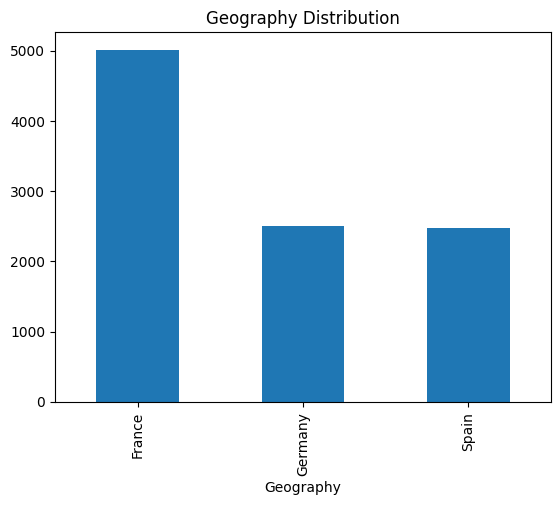

In [15]:
df["Geography"].value_counts().plot(kind="bar", title="Geography Distribution of customers")

In [17]:
df_exited = df[df["Exited"] == 0]
df_exited.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
10,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
11,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
12,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0
13,15691483,Chin,549,France,Female,25,5,0.00,2,0,0,190857.79,0


In [26]:
df_exited["Gender"].value_counts()

Gender
Male      4559
Female    3404
Name: count, dtype: int64

In [18]:
df_france = df[df["Geography"] == "France"]
df_spain = df[df["Geography"] == "Spain"]
df_germany = df[df["Geography"] == "Germany"]

In [22]:
average_balance = df_france["Balance"].median()
average_balance

np.float64(62153.5)

In [23]:
average_balance = df_spain["Balance"].median()
average_balance

np.float64(61710.44)

In [24]:
average_balance = df_germany["Balance"].median()
average_balance

np.float64(119703.1)

ecleaning values